### Binning
- Grouping of values into bins
- Converts numeric into categorical variables
- eg age
    - 0 to 5, 6-10, 11-15 so on
- bin can improve accuracy of predictive models.
- Group a set of numerical values into set of bins () better understand of data distrbution
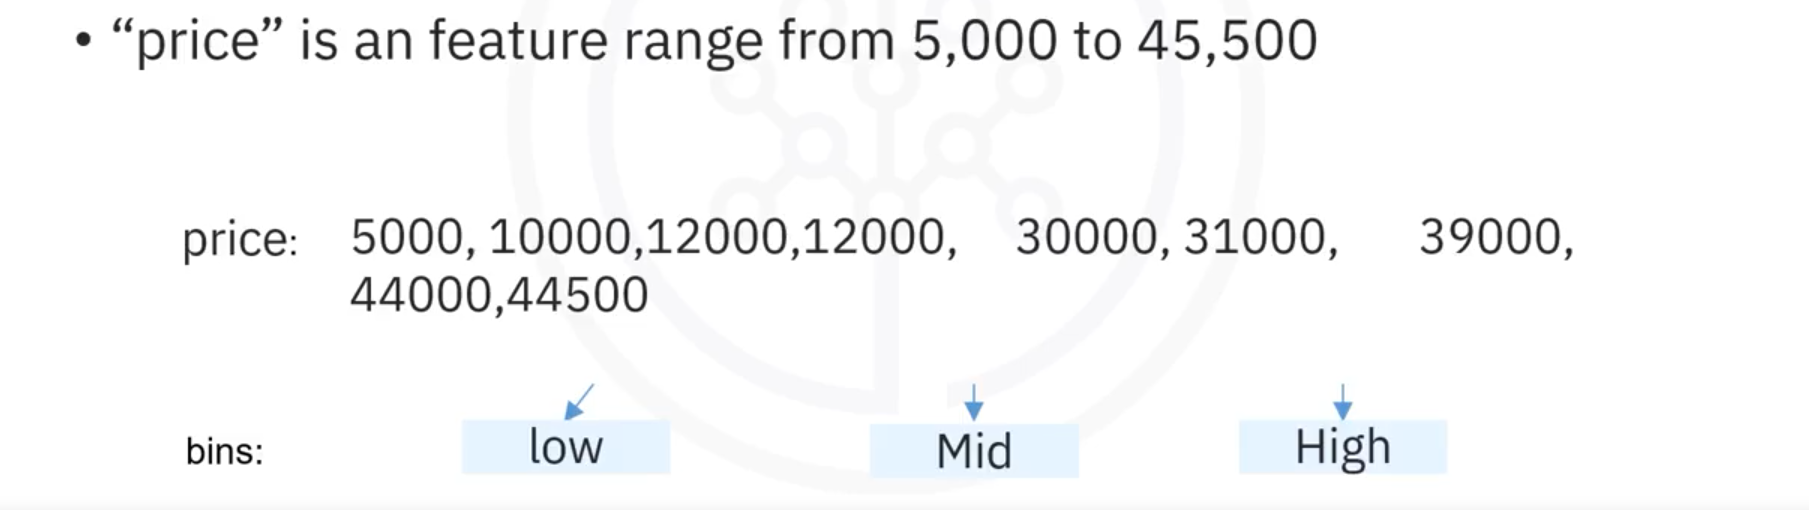

#### Price can be categorize them into three bins
- low, medium, high price cars
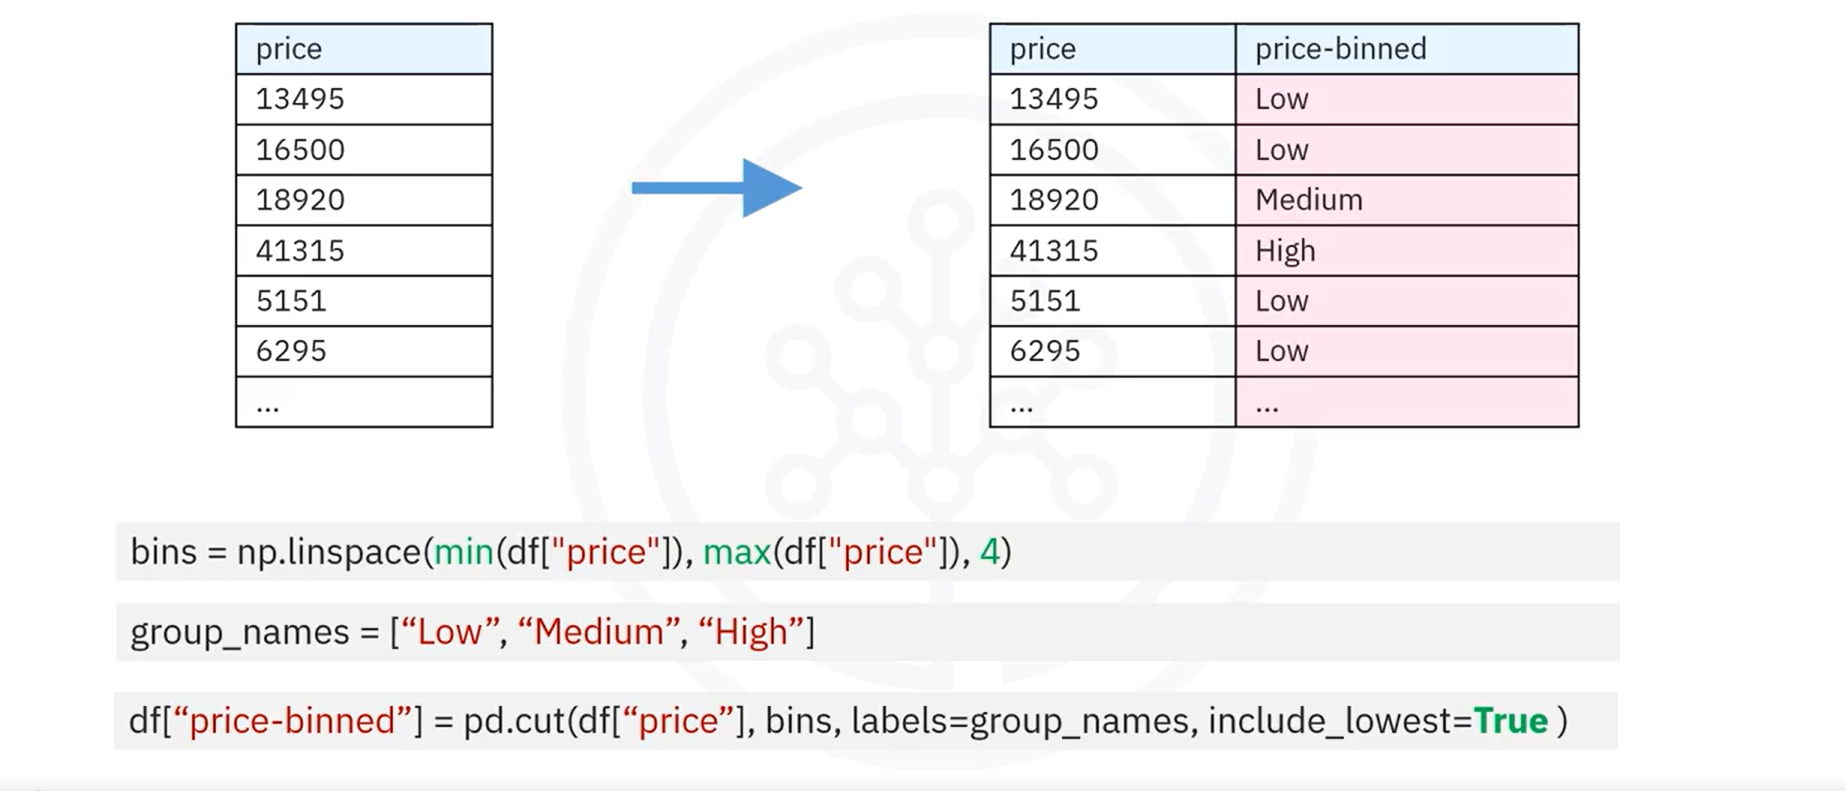

In [1]:
import pandas as pd
import numpy as np

headers = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style", "drive-wheels",
           "engine-location", "wheel-base","length","width","height", "curb-weight", "engine-type", "num-of-cylinders",
           "engine-size","fuel-system","bore", "stroke", "compression-ratio", "horsepower", "peak-rpm", "city-mpg",
           "highway-mpg","price"]

df = pd.read_csv("../data/automobile.csv")

df.columns = headers

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
df["price"].isnull().values.any()

False

In [12]:
df["price"].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
200    False
201    False
202    False
203    False
204    False
Name: price, Length: 205, dtype: bool

In [9]:
df.replace("?",np.nan, inplace = True)

In [14]:
df["price"] = pd.to_numeric(df["price"], errors='coerce')
mean=df["price"].mean()

df["price"].replace(np.nan, mean)

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [15]:
df["price"].mean()

13207.129353233831

In [16]:
max(df["price"])

45400.0

In [17]:
bins = np.linspace(min(df["price"]), max(df["price"]),4)
bins

array([ 5118.        , 18545.33333333, 31972.66666667, 45400.        ])

In [19]:
group_names = ["Low", "Medium", "High"]

df["price-binned"] = pd.cut(df["price"], bins, labels = group_names, include_lowest= True)
df[["price","price-binned"]]

,price,price-binned
0,13495.0,Low
1,16500.0,Low
2,16500.0,Low
3,13950.0,Low
4,17450.0,Low
...,...,...
200,16845.0,Low
201,19045.0,Medium
202,21485.0,Medium
203,22470.0,Medium


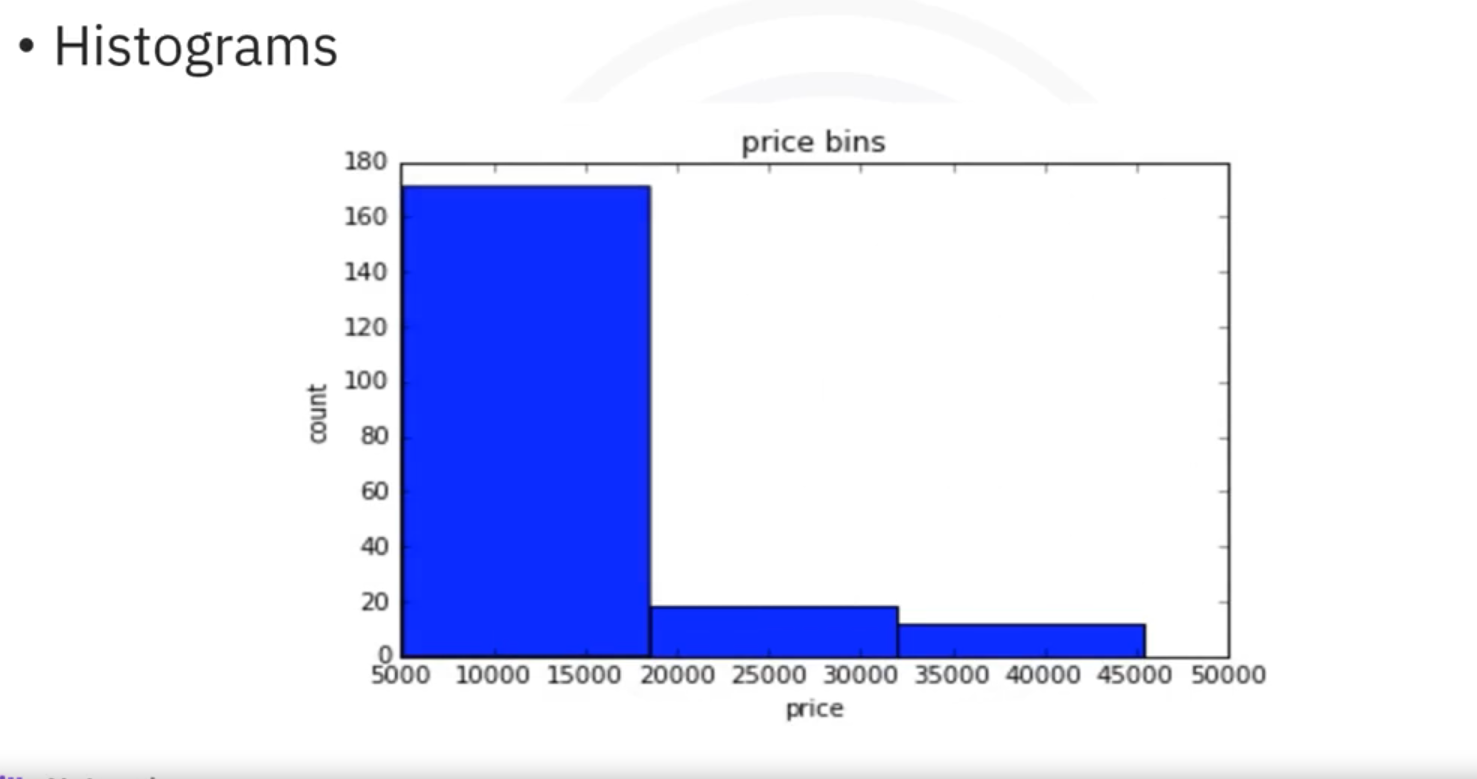## 

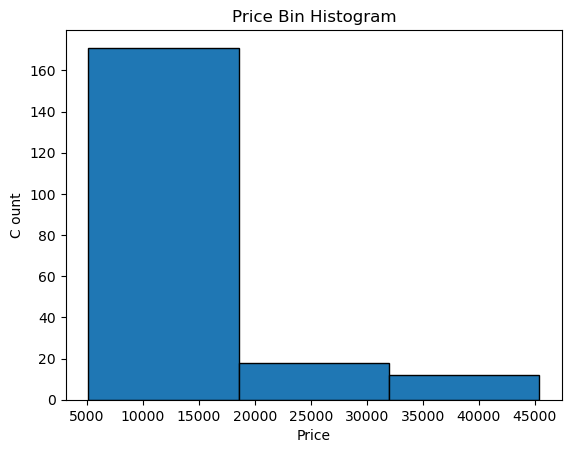

<module 'matplotlib.colors' from 'C:\\Users\\Bindra\\anaconda3\\Lib\\site-packages\\matplotlib\\colors.py'>

In [29]:
import matplotlib.pyplot as plt
from matplotlib import colors

plt.hist(df["price"],len(group_names) , edgecolor='black')

plt.xlabel('Price')
plt.ylabel('C ount')
plt.title('Price Bin Histogram')
 
# Display the plot
plt.show()
colors